In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's make_blobs method. The make_blobs is used to create sample values and contains many parameters that change the shape and values of the sample dataset. For our purposes, we'll use the make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. In our notebook, we can generate and visualize our dummy data using the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

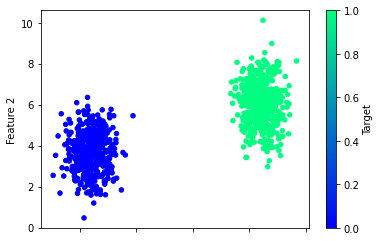

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

To create the neural network in our notebook, first we must create our Sequential model. To do this, we must add the following code to the notebook:

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

The input_dimparameter indicates how many inputs will be in the model (in this case two).
The units parameter indicates how many neurons we want in the hidden layer (in this case one).
The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Once again, we'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
#Now that we have added our layers to the Sequential model, we can double-check our model structure using the summary method. 
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.



In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

At last, our Sequential neural network is modeled and compiled, so now we can move onto training/fitting our model to the dummy data. To train/fit our Keras model, we'll use the fit method and provide the x training values and y training values, as well as the number of epochs. Each epoch is a complete pass through the training data. As we tested earlier in the TensorFlow Playground, the neural network binary classification model reached optimal performance at around 100 epochs. Since we designed our Sequential model to match the TensorFlow Playground simulation, we should expect similar performance. 

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.8133
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.8360
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.8453
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8627
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.8680
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.8733
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.8773
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.8827
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8867
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1006 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 960us/step - loss: 0.0869 - accuracy: 1.0000
Epoch 92/10

<AxesSubplot:>

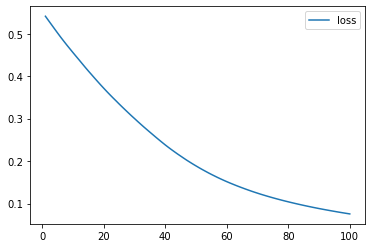

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

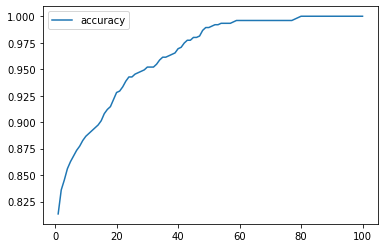

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

Now that our model has been properly trained, we must evaluate model performance using the test data. Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the evaluate method and print the testing loss and accuracy values.

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0768 - accuracy: 1.0000
Loss: 0.07683654874563217, Accuracy: 1.0


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning model. Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. 

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [15]:
from sklearn.datasets import make_moons

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

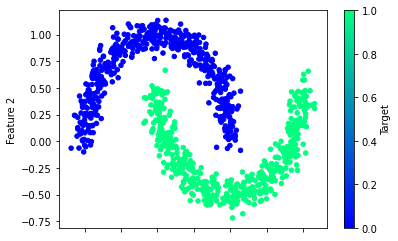

In [16]:
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.

In [21]:
#create train and test data 
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state = 78)

#create scaler instance 
X_moon_scaler = skl.preprocessing.StandardScaler()

#fit the scaler 
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [22]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.1861 - accuracy: 0.4560
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0094 - accuracy: 0.4893
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.5173
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8285 - accuracy: 0.5387
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7733 - accuracy: 0.5560
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.5827
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.6040
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6213
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6400
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6507
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8893
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.8893
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.8893
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8893
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8893
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.8907
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.8907
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.8907
Epoch 93/100


In our example, TensorFlow stopped training the model after 84 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

<AxesSubplot:>

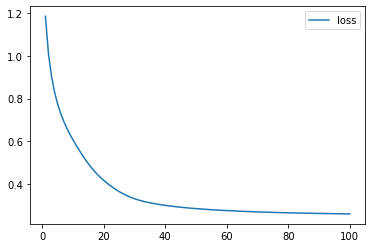

In [23]:
#create dataframe to hold training history 
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

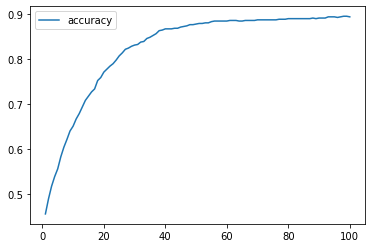

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")

adding more neurons to hidden layers, two input values, there should be six neurons in the hidden layer. 


In [25]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

Using our new Sequential model, we'll add our input, hidden, and output layers using the Dense class. However, this time we'll create a hidden layer with six neurons instead of one by changing the units parameter while keeping all other parameters the same.

In [26]:
#add the input and hidden layers 
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))
# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

For us to make direct comparisons with our single-neuron model, we'll use the same training parameters, including loss metric, optimizer function, and number of epochs.

In [27]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6862 - accuracy: 0.5533
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.7213
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.7573
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.7720
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7760
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7947
Epoch 7/100
24/24 [==============================] - 0s 872us/step - loss: 0.5189 - accuracy: 0.7960
Epoch 8/100
24/24 [==============================] - 0s 991us/step - loss: 0.4977 - accuracy: 0.7987
Epoch 9/100
24/24 [==============================] - 0s 873us/step - loss: 0.4771 - accuracy: 0.8000
Epoch 10/100
24/24 [==============================] - 0s 956us/step - loss: 0.4577 - accuracy: 0.8040
E

24/24 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9027
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9013
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9027
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9013
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2265 - accuracy: 0.9013
Epoch 87/100
24/24 [==============================] - 0s 782us/step - loss: 0.2257 - accuracy: 0.9013
Epoch 88/100
24/24 [==============================] - 0s 879us/step - loss: 0.2250 - accuracy: 0.9027
Epoch 89/100
24/24 [==============================] - 0s 939us/step - loss: 0.2242 - accuracy: 0.9027
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9040
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9027
Epoch 9

Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.

one hot encoding_bucketing 

In [29]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("Resources/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Poland             4
Fiji               4
Holland            4
Sarawak            3
Finland            3
Dubai              3
Sweden             3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

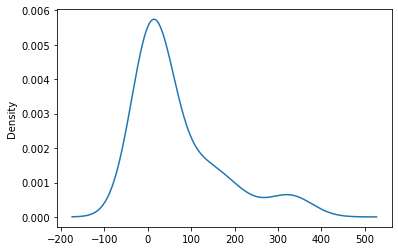

In [30]:
# Visualize the value counts
country_counts.plot.density()

According to the density plot, the most common unique values have more than 100 instances within the dataset. Therefore, we can bucket any country that appears fewer than 100 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method.

In [32]:
#determine which values to be replaced 
replace_countries = list(country_counts[country_counts<100].index)
#replace in dataframe 
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")
# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

Now that we have reduced the number of unique values in the country variable, we're ready to transpose the variable using one-hot encoding. The easiest way to perform one-hot encoding in Python is to use Scikit-learn's OneHotEncoder module on the country variable. To build the encoded columns, we must create an instance of OneHotEncoder and "fit" the encoder with our values. 

In [33]:
#create onehotencoder instance 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We must join the encoded DataFrame with the original and drop the original "Country" column. The process of joining the two DataFrames together is handled by the Pandas merge method and can be performed within one line.

In [34]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df, left_index=True, right_index=True).drop("Country",1)


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


standardization 

In [35]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("Resources/hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [37]:
#create standardization instance 
scaler = StandardScaler()
# Fit the StandardScaler
scaler.fit(hr_df)
# Scale the data
scaled_data = scaler.transform(hr_df)

In [38]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
